In [212]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [213]:
df= pd.read_csv('/content/diabetes.csv')

In [214]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [215]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [216]:
x = df.iloc[:,0:8]
y = df['Outcome']

In [217]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [218]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [223]:
print('TRAINING DATA: ', x_train.shape, y_train.shape)
print('TESTING DATA: ', x_test.shape, y_test.shape)

TRAINING DATA:  (614, 8) (614,)
TESTING DATA:  (154, 8) (154,)


In [224]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(12, input_dim = 8, activation='relu'),
                                    tf.keras.layers.Dense(6, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [225]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [226]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [227]:
history = model.fit(x_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5651
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6596
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.6743
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.6840
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7003
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7182
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7410
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7573
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7687
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7785
Epoch 11/

In [228]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7532


[0.5600241422653198, 0.7532467246055603]

In [229]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training loss')

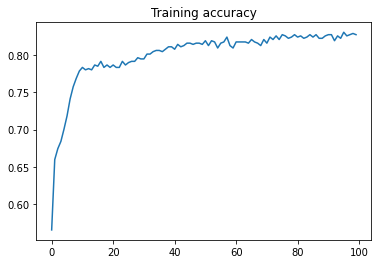

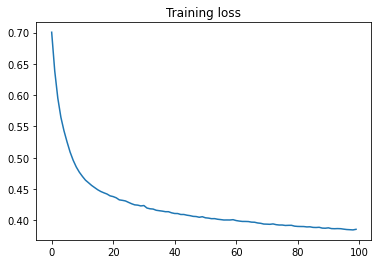

In [230]:
acc = history.history[     'accuracy' ]
loss = history.history[    'loss' ]

epochs   = range(len(acc)) 
plt.plot  ( epochs,     acc )

plt.title ('Training accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.title ('Training loss'   )